In [2]:
import pandas as pd
df = pd.read_csv("Microsoft_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 65.0+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [6]:
#To remove the null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
#To remove the duplicates in the data.
df.drop_duplicates()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [8]:
#Identifing the outliers - box plot, scatter plot
cols = ['Open','Close','High','Low']
df_melted = df[cols].melt(var_name = "Columns", value_name = "Values")

In [9]:
%pip install seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


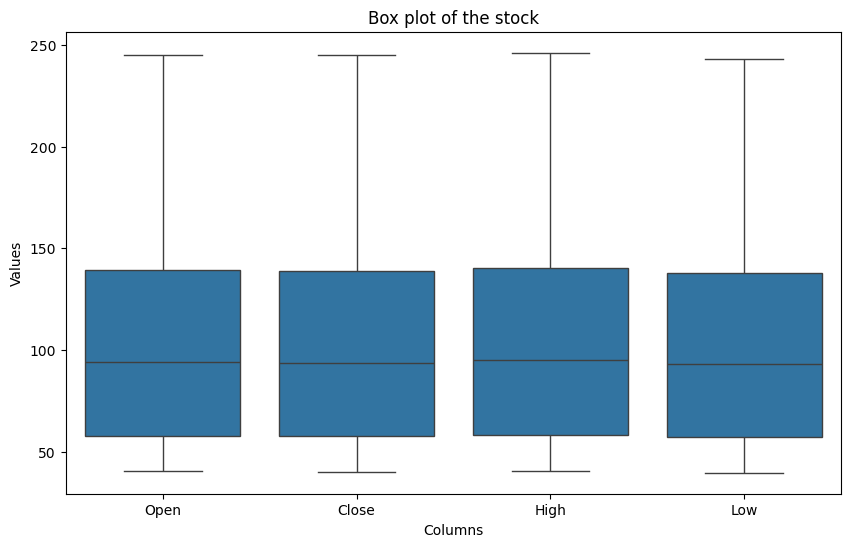

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Columns",y = "Values",data = df_melted)
plt.title("Box plot of the stock")
plt.show()

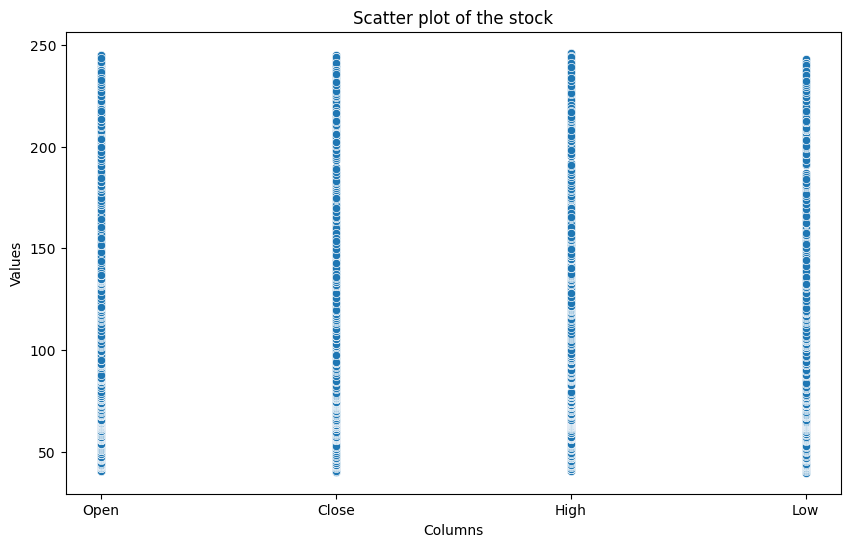

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "Columns", y = "Values", data = df_melted)
plt.title("Scatter plot of the stock")
plt.show()

In [13]:
#There is no outliers present, If there any we should follow the below IQR method to remove it.
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 

In [14]:
df.shape[0] #Since there is no outliers 

1511

In [15]:
#Now we are going to procedure with the exploratory data analysis.
#step 1: Let's us analyze the trend of stock price over time.
# we have to convert the data to datatime into order to calculate the trend.
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [17]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [18]:
# We missed to insert the column date 
cols = ['Date','Open','Close','High','Low']
df_melted = df[cols].melt(id_vars = "Date",var_name = "Columns", value_name = "Values") #id_vars make sure it doesn't melt with the other.

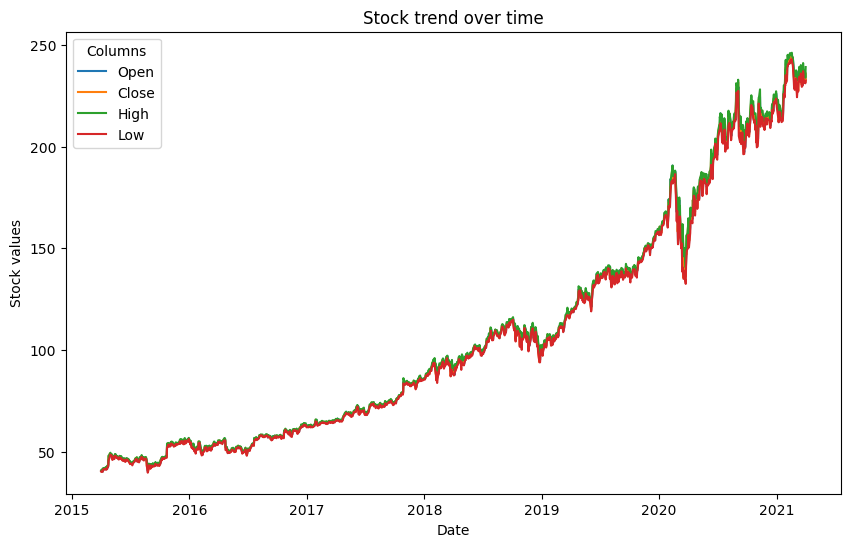

In [19]:
plt.figure(figsize = (10,6))
sns.lineplot(x="Date",y="Values",hue="Columns",data = df_melted) #hue to separate the line based on columns
plt.title("Stock trend over time")
plt.xlabel("Date")
plt.ylabel("Stock values")
plt.show()

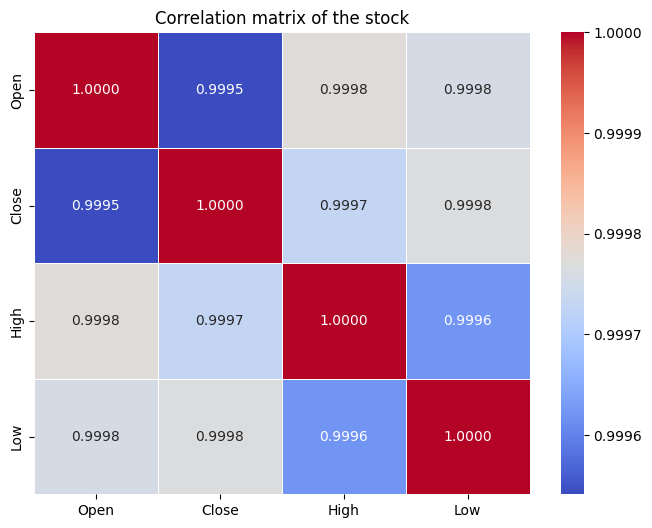

In [22]:
correlation_matrix = df[['Open','Close','High','Low']].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot = True,fmt = ".4f", cmap = 'coolwarm',linewidths = 0.5)
plt.title("Correlation matrix of the stock")
plt.show()

In [24]:
# As it is a stock dataset we are going to set "Close" as our target variable.
target = "Close"

In [26]:
#So let us keep the other columns as features.
features = ["Open","Low","High"]

In [28]:
#Let us split the data for training as well as for testing.
from sklearn.model_selection import train_test_split
x = df[features]
y = df[target]
#x_train = Features for training set and y_train = target for training set and similarlly for test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [30]:
#Now for building a regression model, let us import sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
#R² = 1 → Perfect prediction
#R² = 0 → Model does no better than the mean
#R² < 0 → Model performs worse than predicting the average
print("R2 SCORE: ",r2_score(y_test,y_pred))
#Lower MSE = better model
print("MSE: ",mean_squared_error(y_test,y_pred))

R2 SCORE:  0.9997234967372737
MSE:  0.8355935852180316


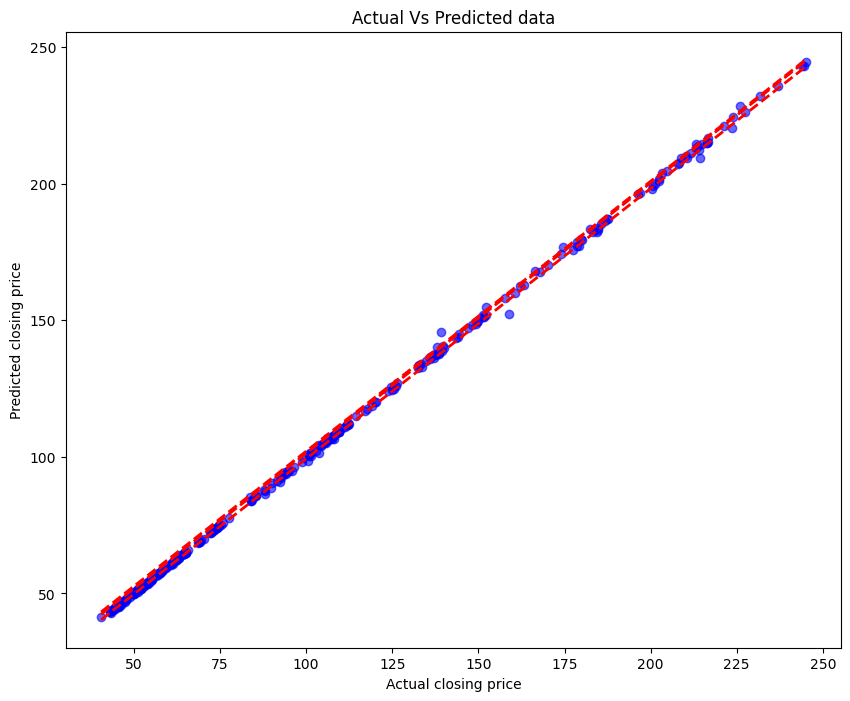

In [32]:
#Now let us evalute the linear regression using scatterplot.
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color="blue",alpha=0.6,label="Actual Vs Predicted data")
plt.plot([y_test.min(),y_test.max()],[x_test.min(),x_test.max()],color="red",linestyle="--",linewidth="2",label="Prediction")
plt.xlabel("Actual closing price")
plt.ylabel("Predicted closing price")
plt.title("Actual Vs Predicted data")
plt.show()